You should use this notebook in the proper location with needed modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# import autodiffcst.AD_vec as cst
import AD_vec as cst

We use VAD in our newton's method finding the minimum of Rosenbrock function (https://en.wikipedia.org/wiki/Rosenbrock_function):

$$ f(x,y)=100(y-x^2)^2+(1-x)^2,$$

which is a common test function used for optimization algorithms.


In [ ]:
The output will be:

starting point: (2,1)

iterations: 6

x: 1.0

y: 1.0

f: 0.0

In [2]:
# define Rosenbrock
def Rsbrk_func(x,y):
    return 100*(y-x**2)**2+(1-x)**2

In iteration $k$, we need to solve $${H}_f s_k=-\Delta_f$$ for $s_k$ to get the stepsize and go to the next.
With ```autodiffCST```, this is easily achieved with three lines:
```python
>>> [a,b] = cst.VAD([x_i,y_i])
>>> Rsbrk = 100*(b-a**2)**2+(1-a)**2
>>> step = np.linalg.solve(VAD.hessian(Rsbrk),-Rsbrk.diff())
```

We test for going from point (2,1).

In [3]:
# Newton's method
x = 2
y = 1
tol = 10**(-8)
stepsize = 1
k = 0
x_i = x
y_i = y
list_x_i = []
list_y_i = []
list_f_i = []
path = []
while stepsize > tol:
    [a,b] = cst.VAD([x_i,y_i])
    Rsbrk = 100*(b-a**2)**2+(1-a)**2
    list_x_i.append(x_i)
    list_y_i.append(y_i)
    list_f_i.append(Rsbrk.val)
    path.append(np.array([x_i,y_i]))
    # Take a Newton step by solving the linear system constructed using the
    # Hessian and gradient
    step = np.linalg.solve(cst.hessian(Rsbrk),-Rsbrk.diff())
    x_i += step[0]
    y_i += step[1]
    stepsize = np.linalg.norm(step)
    k += 1

In [4]:
print('--------')
print("starting point: ({0},{1})".format(x,y))
print("iterations:",k)
print("x:",list_x_i[-1])
print("y:",list_y_i[-1])
print("f:",list_f_i[-1][0])

--------
starting point: (2,1)
iterations: 6
x: 1.0
y: 1.0
f: 0.0


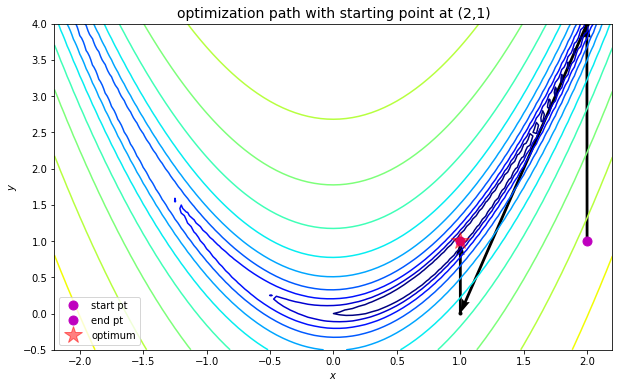

In [5]:
# plot
path_ = np.array(np.copy(path))
start = np.array([x,y])
end = np.array([list_x_i[-1],list_y_i[-1]])
optimum = np.array([1,1])
xmin, xmax, xstep = -2.2, 2.2, .05
ymin, ymax, ystep = -0.5, 4, .05
X,Y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
Z = Rsbrk_func(X,Y)

fig, ax = plt.subplots(figsize=(10, 6))
path = path_.T
cp = ax.contour(X,Y,Z, levels=np.logspace(0, 5, 15), norm=LogNorm(),cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, width=.005,color='k')
ax.plot(list_x_i, list_y_i,'.', color='k')
ax.plot(*start, '.', color='m',markersize=18,label='start pt')
ax.plot(*end, '.',color='m', markersize=18,label='end pt')
ax.plot(*optimum, 'r*', markersize=18,alpha=0.5,label='optimum')
ax.legend(loc='lower left')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('optimization path with starting point at ({0},{1})'.format(x,y),fontsize=14)

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.show()

So we see we converge to the point $(1,1)$ with value $0$.
This is a minimum.